# Import Library

In [1]:
# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from scipy.stats import skew

# Import library untuk modelling/analysis
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 

# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

# Import library untuk deployment
import pickle

print('Import Library Berhasil dilakukan ^_^')

C:\Users\Fransisca Mulya Sari\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Fransisca Mulya Sari\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Import Library Berhasil dilakukan ^_^


# EDA (Exploratory Data Analysis)

## Menampilkan dataset

In [3]:
data = pd.read_csv('data harga rumah smg.csv')
data.head()

Jenis_Rumah                    Lokasi  KT  KM  Garasi   LT    LB  Harga_New
0       Rumah       Tembalang, Semarang   2   1       1   60  30.0        0.3
1       Rumah  Semarang Timur, Semarang   2   1       1   65  30.0        0.3
2       Rumah     Gunung Pati, Semarang   2   1       1  120  32.0        0.3
3       Rumah           Genuk, Semarang   2   1       1   60  36.0        0.3
4       Rumah       Tembalang, Semarang   2   1       1   72  36.0        0.3

In [4]:
data = data.rename(columns={'KT': 'Kamar_Tidur',
                               'KM': 'Kamar_Mandi',
                               'LT': 'Luas_Tanah',
                               'LB': 'Luas_Bangunan',
                               'Harga_New' : 'Harga'})
data.head()

Jenis_Rumah                    Lokasi  Kamar_Tidur  Kamar_Mandi  Garasi  \
0       Rumah       Tembalang, Semarang            2            1       1   
1       Rumah  Semarang Timur, Semarang            2            1       1   
2       Rumah     Gunung Pati, Semarang            2            1       1   
3       Rumah           Genuk, Semarang            2            1       1   
4       Rumah       Tembalang, Semarang            2            1       1   

   Luas_Tanah  Luas_Bangunan  Harga  
0          60           30.0    0.3  
1          65           30.0    0.3  
2         120           32.0    0.3  
3          60           36.0    0.3  
4          72           36.0    0.3

## Menampilkan informasi data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jenis_Rumah    9533 non-null   object 
 1   Lokasi         9533 non-null   object 
 2   Kamar_Tidur    9533 non-null   int64  
 3   Kamar_Mandi    9533 non-null   int64  
 4   Garasi         9533 non-null   int64  
 5   Luas_Tanah     9533 non-null   int64  
 6   Luas_Bangunan  9533 non-null   float64
 7   Harga          9533 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 595.9+ KB


## Mengubah tipe data

In [6]:
data = data.astype({'Luas_Bangunan': 'int64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jenis_Rumah    9533 non-null   object 
 1   Lokasi         9533 non-null   object 
 2   Kamar_Tidur    9533 non-null   int64  
 3   Kamar_Mandi    9533 non-null   int64  
 4   Garasi         9533 non-null   int64  
 5   Luas_Tanah     9533 non-null   int64  
 6   Luas_Bangunan  9533 non-null   int64  
 7   Harga          9533 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 595.9+ KB


## Memeriksa data null

In [7]:
data.isna().sum()

Jenis_Rumah      0
Lokasi           0
Kamar_Tidur      0
Kamar_Mandi      0
Garasi           0
Luas_Tanah       0
Luas_Bangunan    0
Harga            0
dtype: int64

## Memeriksa data duplikat

In [8]:
duplikat = data.duplicated().sum()
print("Jumlah data duplikat :", duplikat)

Jumlah data duplikat : 0


## Melihat ukuran data

In [9]:
data.shape

(9533, 8)

## Deskripsi data statistik (numerik)

In [10]:
data.describe()

Kamar_Tidur  Kamar_Mandi       Garasi   Luas_Tanah  Luas_Bangunan  \
count  9533.000000  9533.000000  9533.000000  9533.000000    9533.000000   
mean      3.326130     2.141928     1.303053   175.165425     155.920172   
std       1.350971     1.159489     0.706326   109.270013     107.200283   
min       2.000000     1.000000     1.000000    28.000000      29.000000   
25%       2.000000     1.000000     1.000000   104.000000      77.000000   
50%       3.000000     2.000000     1.000000   142.000000     124.000000   
75%       4.000000     3.000000     1.000000   210.000000     200.000000   
max       9.000000    10.000000    10.000000   912.000000     900.000000   

             Harga  
count  9533.000000  
mean      1.653170  
std       1.181362  
min       0.300000  
25%       0.700000  
50%       1.300000  
75%       2.300000  
max       5.000000

## Visualisasi

### Visualisasi Pairplot

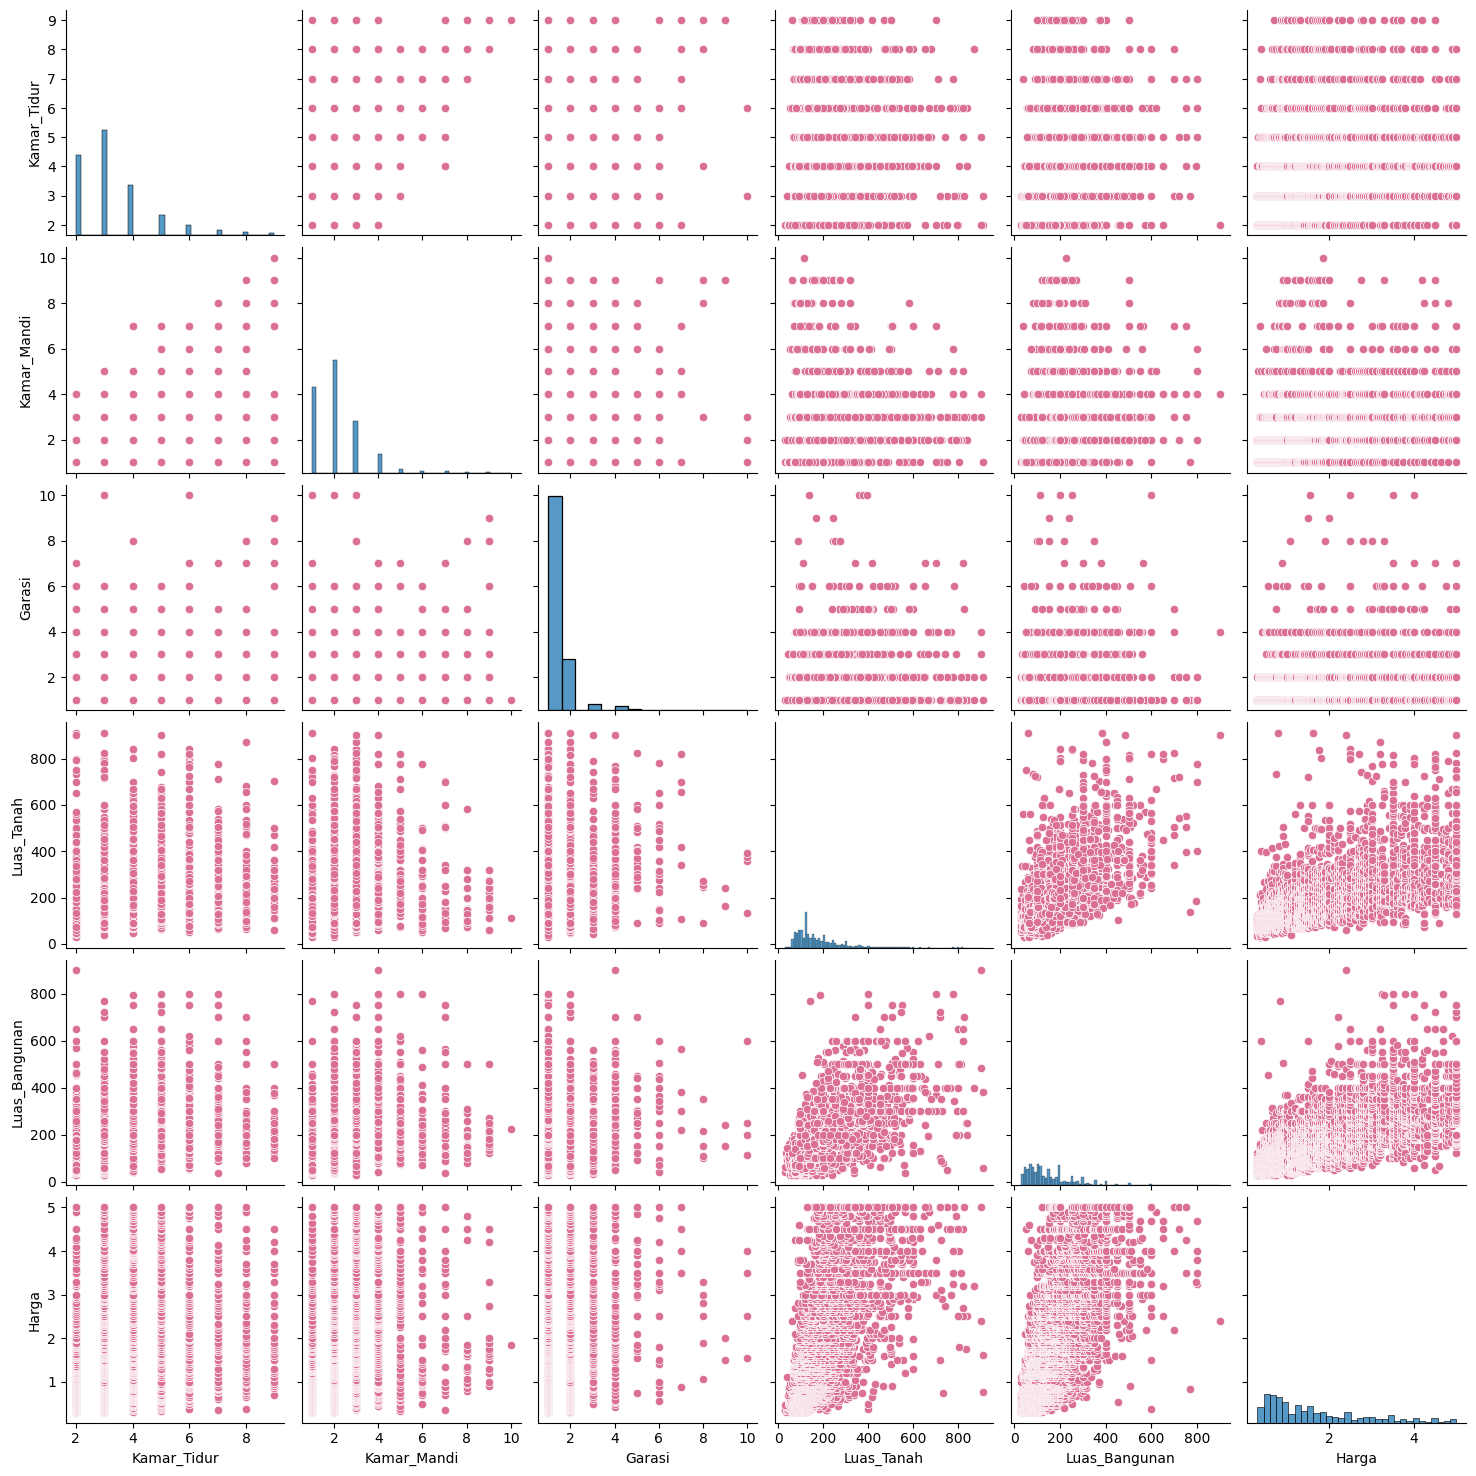

In [10]:
sns.pairplot(data, plot_kws={'color': 'palevioletred'})
plt.show()

### Bagaimana persebaran dan persentase penjualan rumah di Kota Semarang?
#### Persebaran

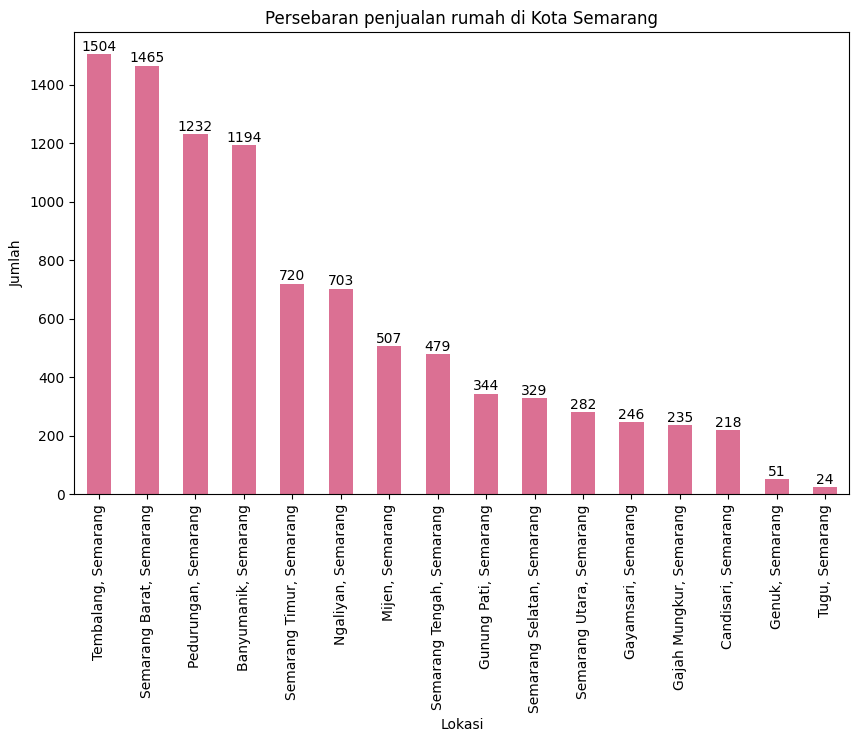

In [10]:
lok = data['Lokasi'].value_counts()
lok.plot(kind='bar', figsize=(10, 6), color='palevioletred')

for i, v in enumerate(lok):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Persebaran penjualan rumah di Kota Semarang')
plt.ylabel('Jumlah')
plt.xlabel('Lokasi')

plt.show()

#### Persentase

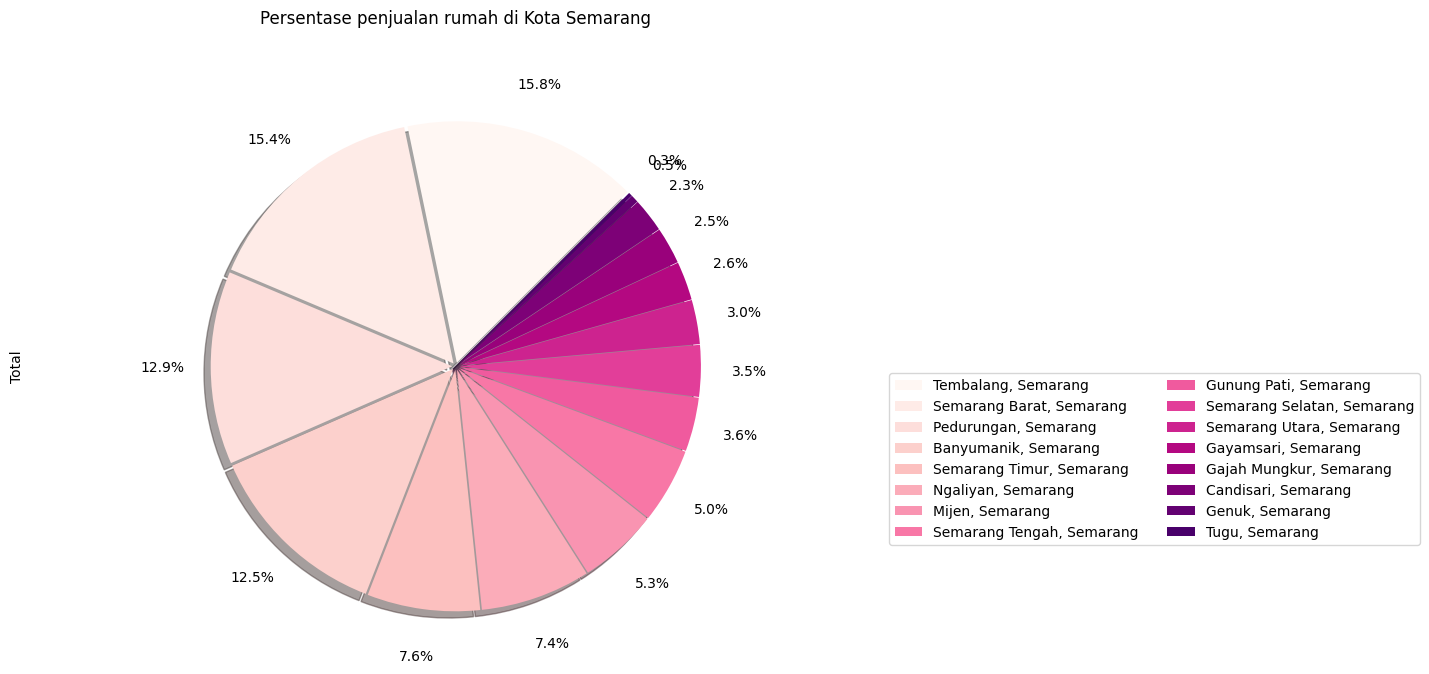

In [11]:
#Buat dataframe baru untuk total rumah tiap lokasi
LK = pd.DataFrame({"Total":data["Lokasi"].value_counts()})
total_LK = LK["Total"]

# Pilih palet warna 'PuRd' dan sesuaikan panjangnya dengan jumlah data
cmap = plt.get_cmap('RdPu')
colors_list = cmap(np.linspace(0, 1, len(total_LK)))  # Mengambil warna sesuai dengan jumlah data

# Pilih ukuran lingkaran (sesuaikan jumlah nilai dengan jumlah kategori)
explode_list = [0.015] * len(total_LK)

# Tambahkan detail
total_LK.plot(kind='pie',
        figsize=(11, 7),
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        labels=None,
        pctdistance=1.2,
        colors=colors_list,
        explode=explode_list)

# Untuk memberikan informasi daerah berwarna
plt.legend(labels=total_LK.index, loc='upper left', bbox_to_anchor=(1, 0.5), ncol=2)
plt.axis('equal')

# Menambahkan judul
plt.title('Persentase penjualan rumah di Kota Semarang', y=1.12)

# Menampilkan
plt.show()

### Bagaimana variasi jumlah KT, KM, dan garasi?

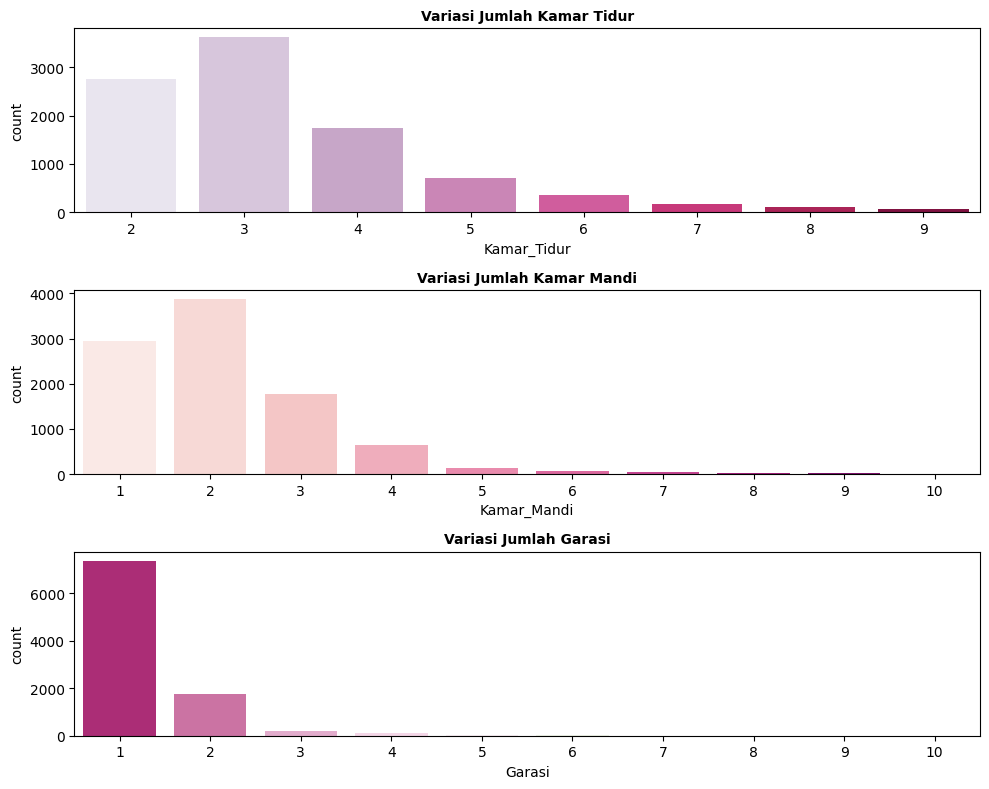

In [41]:
fig, ax = plt.subplots(3, 1, figsize=(10,8))

# Kamar Tidur
sns.countplot(x=data['Kamar_Tidur'], palette='PuRd', ax=ax[0])
ax[0].set_title("Variasi Jumlah Kamar Tidur", fontweight='bold', fontsize=10)

# Kamar Mandi
sns.countplot(x=data['Kamar_Mandi'], palette='RdPu', ax=ax[1])
ax[1].set_title("Variasi Jumlah Kamar Mandi", fontweight='bold', fontsize=10)

# Garasi
sns.countplot(x=data['Garasi'], palette='PiYG', ax=ax[2])
ax[2].set_title("Variasi Jumlah Garasi", fontweight='bold', fontsize=10)

# Mengatur tata letak
fig.tight_layout()

# Menampilkan plot
plt.show()

### Apa saja jenis rumah yang terdapat pada data tersebut?

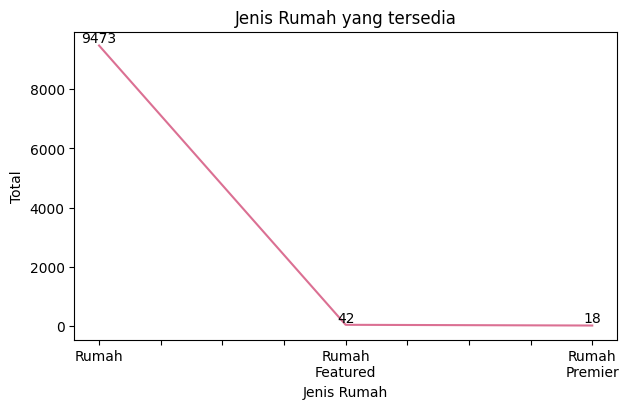

In [13]:
# Membuat dataframe total jenis rumah
JR = pd.DataFrame({"Total":data["Jenis_Rumah"].value_counts()})
total_JR = JR["Total"]

#Membuat diagram garis
total_JR.plot(kind='line', figsize=(7, 4), color='palevioletred')

for i, v in enumerate(total_JR):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Jenis Rumah yang tersedia')
plt.ylabel('Total')
plt.xlabel('Jenis Rumah')

plt.show()

### Berapa rata-rata harga per lokasi?

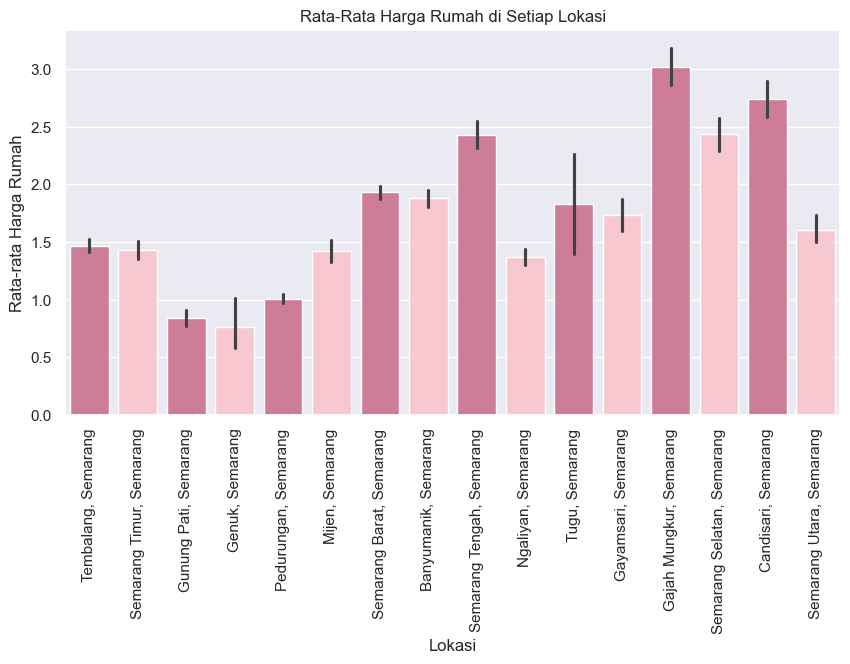

In [14]:
sns.set(rc={'figure.figsize':(10,5)})
cols = ['palevioletred', 'pink']

plt.xticks(rotation=90)
sns.barplot(x='Lokasi', y='Harga_New', palette=cols, data=data, estimator=np.mean)

plt.title('Rata-Rata Harga Rumah di Setiap Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Rata-rata Harga Rumah')
plt.show()

### Apakah ada korelasi antara jumlah KT, jenis rumah dan harga rumah?

Text(0.5, 1.0, 'Korelasi antara jumlah kamar tidur, jenis rumah dan harga rumah')

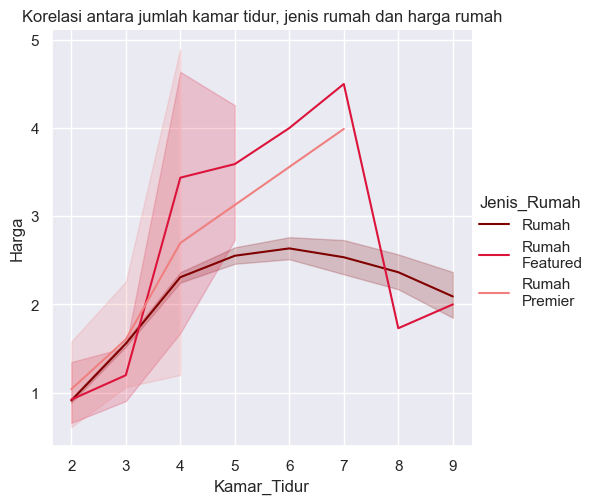

In [42]:
cols = ['maroon','crimson','lightcoral']
sns.set(rc={'figure.figsize':(10,5)})
sns.relplot(kind='line',
            x='Kamar_Tidur',
            y='Harga',
            hue='Jenis_Rumah',
            data=data,
            palette = cols)
plt.title('Korelasi antara jumlah kamar tidur, jenis rumah dan harga rumah')


### Apakah LT dan LB dapat mempengaruhi harga rumah?

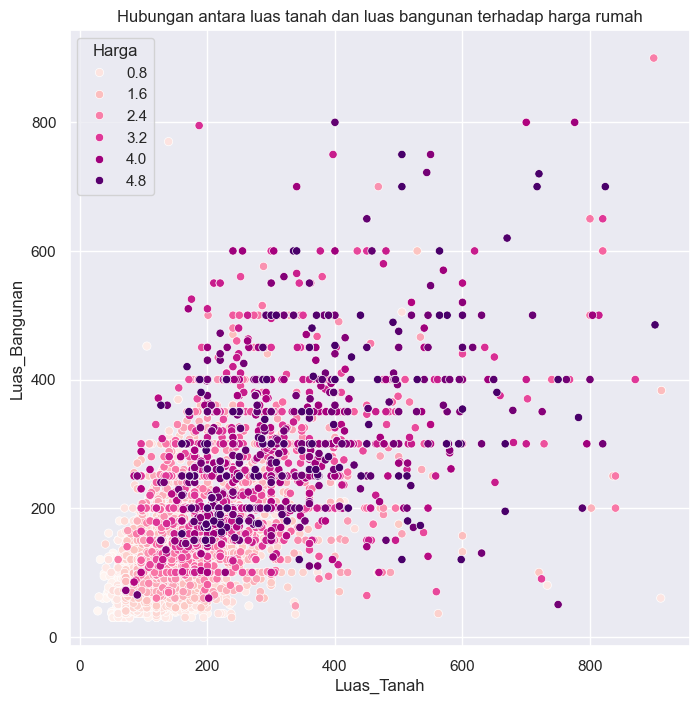

In [44]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Luas_Tanah', y='Luas_Bangunan', hue='Harga', palette='RdPu', data=data)
plt.title('Hubungan antara luas tanah dan luas bangunan terhadap harga rumah')
plt.show()

## Analisis korelasi


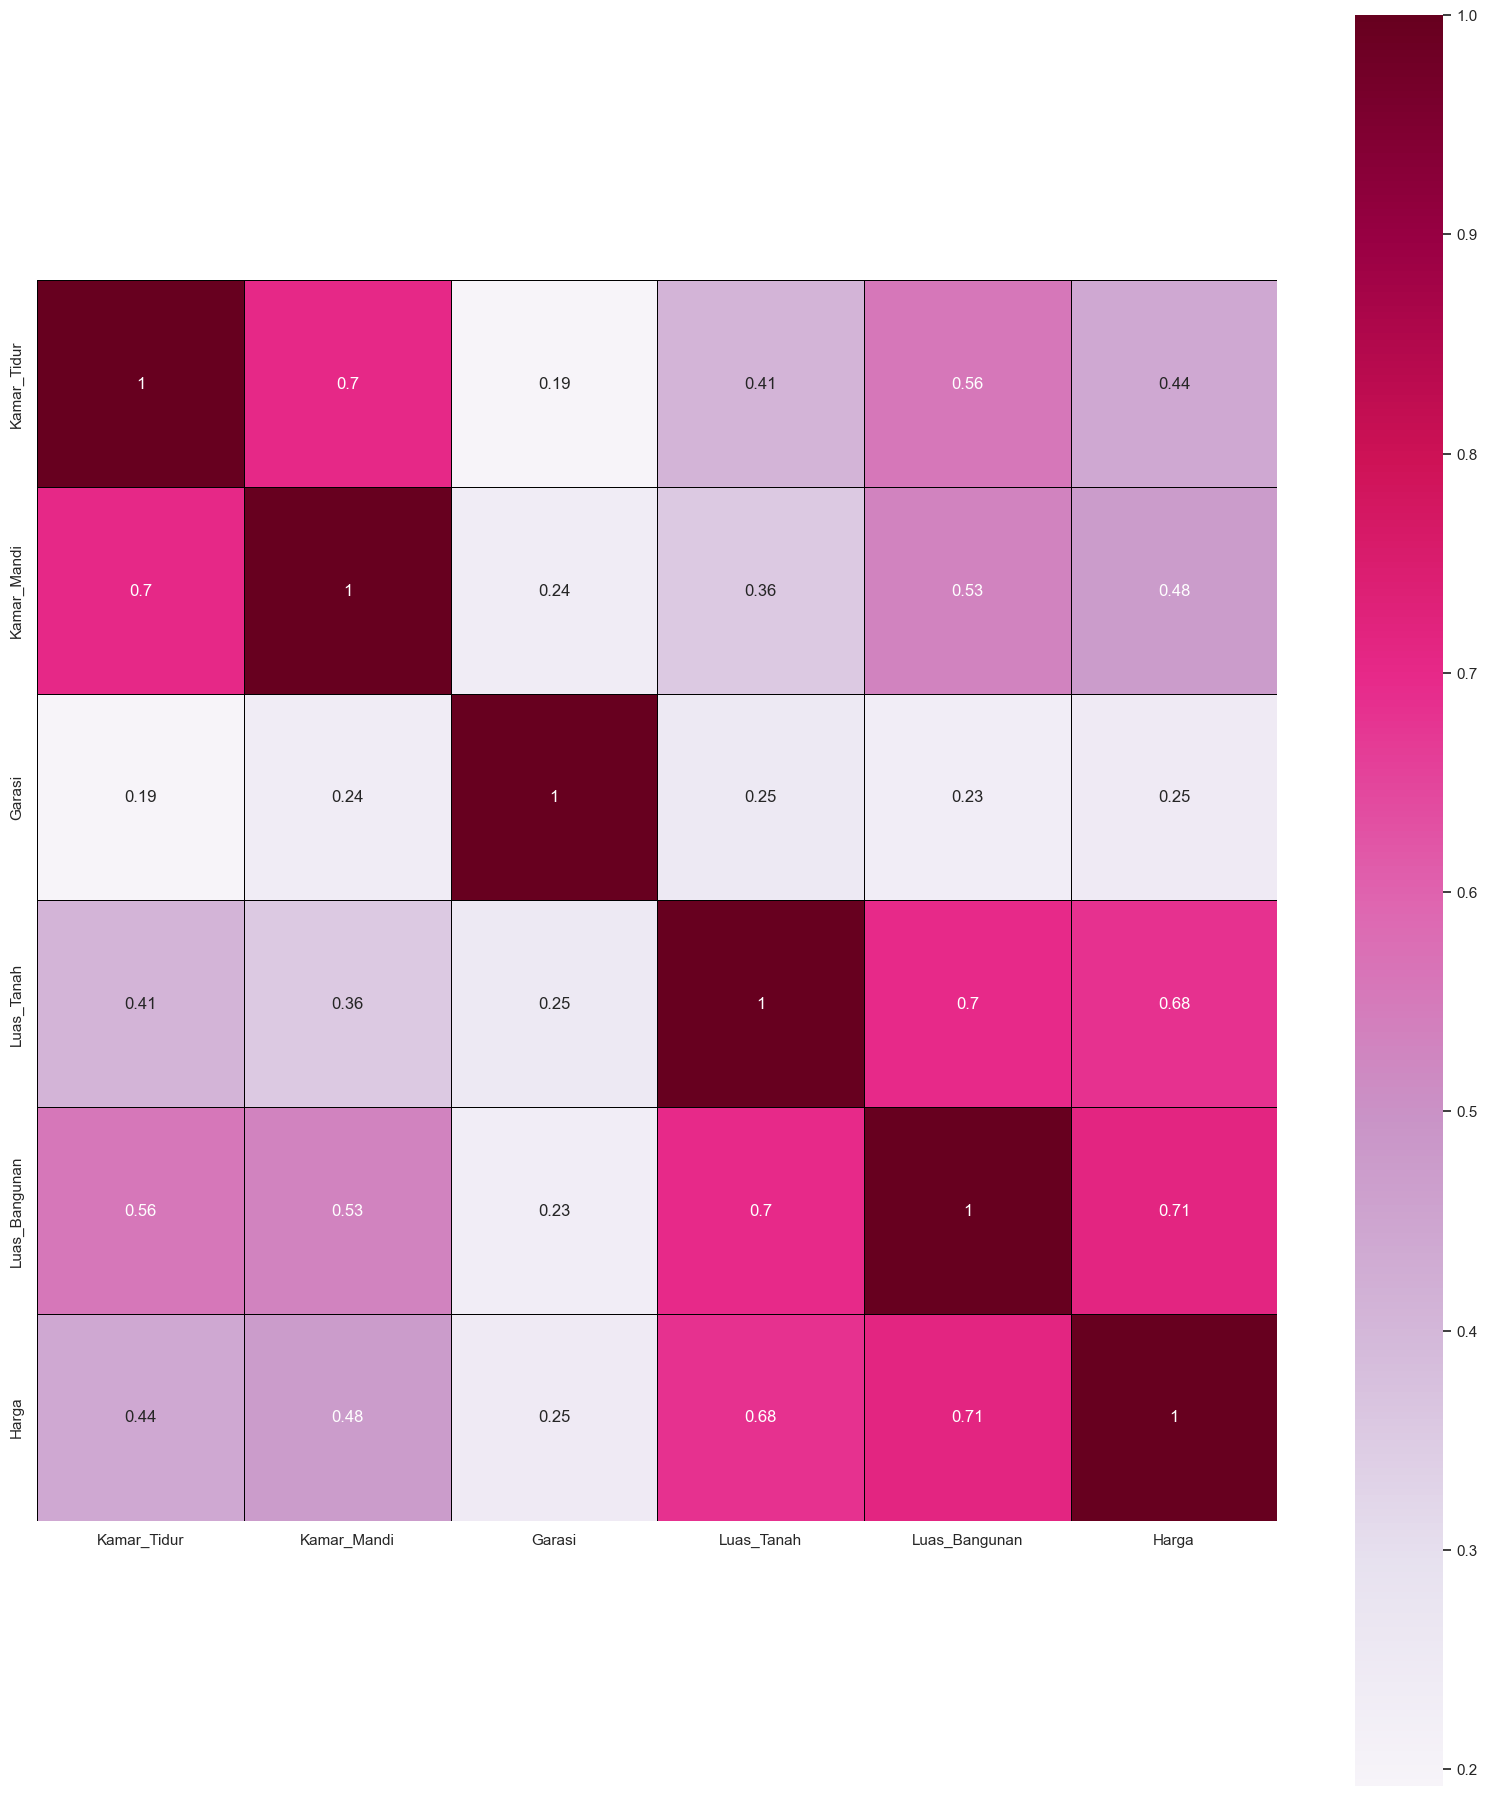

In [45]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df,list_kolom): 
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #Mengatur ukuran
    
    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap="PuRd", 
                linewidths=.5, 
                linecolor='black', 
                square=True) 

heat_map_modeling = ["Kamar_Tidur","Kamar_Mandi","Garasi","Luas_Tanah","Luas_Bangunan","Harga"]
heat_map(data, heat_map_modeling)

# Data Pre-processing

## Cardinality 
Cardinality / Kardinalitas adalah ukuran keunikan data pada kolom tertentu dari suatu table database. Tujuan kita adalah mengurangi cardinality untuk membuat model yang lebih konsisten dan tidak over-fit. Kita memastikan semua label unik yang ada pernah dilihat model saat training.

In [11]:
# Menggunakan df_cleaning
df_card = data.loc[:,["Jenis_Rumah", "Lokasi", "Kamar_Tidur","Kamar_Mandi","Garasi","Luas_Tanah","Luas_Bangunan","Harga"]]

print('Jumlah kategori dalam variabel "Jenis Rumah"             : {}'.format(len(df_card.Jenis_Rumah.unique())))
print('Jumlah kategori dalam variabel "Lokasi"                  : {}'.format(len(df_card.Lokasi.unique())))
print('Jumlah kategori dalam variabel "Kamar Tidur"             : {}'.format(len(df_card.Kamar_Tidur.unique())))
print('Jumlah kategori dalam variabel "Kamar Mandi"             : {}'.format(len(df_card.Kamar_Mandi.unique())))
print('Jumlah kategori dalam variabel "Garasi"                  : {}'.format(len(df_card.Garasi.unique())))
print('Jumlah kategori dalam variabel "Luas Tanah"              : {}'.format(len(df_card.Luas_Tanah.unique())))
print('Jumlah kategori dalam variabel "Luas Bangunan"           : {}'.format(len(df_card.Luas_Bangunan.unique())))
print('Jumlah kategori dalam variabel "Harga"                   : {}'.format(len(df_card.Harga.unique())))

Jumlah kategori dalam variabel "Jenis Rumah"             : 3
Jumlah kategori dalam variabel "Lokasi"                  : 16
Jumlah kategori dalam variabel "Kamar Tidur"             : 8
Jumlah kategori dalam variabel "Kamar Mandi"             : 10
Jumlah kategori dalam variabel "Garasi"                  : 10
Jumlah kategori dalam variabel "Luas Tanah"              : 500
Jumlah kategori dalam variabel "Luas Bangunan"           : 363
Jumlah kategori dalam variabel "Harga"                   : 487


## Encoding (Label encode)

In [12]:
# Membuat objek LabelEncoder untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()
df_Lencode = data.copy()

# Misalkan kolom 'tipe_rumah' adalah fitur kategorikal
categorical_features = ['Jenis_Rumah','Lokasi']
label_encoders = {}

# Melakukan label encoding pada fitur kategorikal dan menyimpan hasilnya
encoded_columns = {}
for feature in categorical_features:
    le = LabelEncoder()
    df_Lencode[feature] = le.fit_transform(df_Lencode[feature])
    label_encoders[feature] = le
    encoded_columns[feature] = le.classes_

# Menampilkan mapping dari label encoding
for feature, classes in encoded_columns.items():
    print(f"Labelling untuk variabel '{feature}':")
    for index, label in enumerate(classes):
        print(f"{label} -> {index}")
        
df_Lencode.head(10)

Labelling untuk variabel 'Jenis_Rumah':
Rumah -> 0
Rumah
Featured -> 1
Rumah
Premier -> 2
Labelling untuk variabel 'Lokasi':
Banyumanik, Semarang -> 0
Candisari, Semarang -> 1
Gajah Mungkur, Semarang -> 2
Gayamsari, Semarang -> 3
Genuk, Semarang -> 4
Gunung Pati, Semarang -> 5
Mijen, Semarang -> 6
Ngaliyan, Semarang -> 7
Pedurungan, Semarang -> 8
Semarang Barat, Semarang -> 9
Semarang Selatan, Semarang -> 10
Semarang Tengah, Semarang -> 11
Semarang Timur, Semarang -> 12
Semarang Utara, Semarang -> 13
Tembalang, Semarang -> 14
Tugu, Semarang -> 15


Jenis_Rumah  Lokasi  Kamar_Tidur  Kamar_Mandi  Garasi  Luas_Tanah  \
0            0      14            2            1       1          60   
1            0      12            2            1       1          65   
2            0       5            2            1       1         120   
3            0       4            2            1       1          60   
4            0      14            2            1       1          72   
5            0       8            2            1       1          84   
6            0       6            2            1       1         120   
7            0       5            2            1       1         120   
8            0       9            2            1       1         126   
9            0       0            2            1       1          91   

   Luas_Bangunan  Harga  
0             30    0.3  
1             30    0.3  
2             32    0.3  
3             36    0.3  
4             36    0.3  
5             36    0.3  
6             36    0.3  
7             36    0.3  
8             36    0.3  
9             38    0.3

In [13]:
df_Lencode.describe()

Jenis_Rumah       Lokasi  Kamar_Tidur  Kamar_Mandi       Garasi  \
count  9533.000000  9533.000000  9533.000000  9533.000000  9533.000000   
mean      0.008182     8.038917     3.326130     2.141928     1.303053   
std       0.109054     4.456609     1.350971     1.159489     0.706326   
min       0.000000     0.000000     2.000000     1.000000     1.000000   
25%       0.000000     6.000000     2.000000     1.000000     1.000000   
50%       0.000000     9.000000     3.000000     2.000000     1.000000   
75%       0.000000    12.000000     4.000000     3.000000     1.000000   
max       2.000000    15.000000     9.000000    10.000000    10.000000   

        Luas_Tanah  Luas_Bangunan        Harga  
count  9533.000000    9533.000000  9533.000000  
mean    175.165425     155.920172     1.653170  
std     109.270013     107.200283     1.181362  
min      28.000000      29.000000     0.300000  
25%     104.000000      77.000000     0.700000  
50%     142.000000     124.000000     1.300000  
75%     210.000000     200.000000     2.300000  
max     912.000000     900.000000     5.000000

## Skewness value

Jenis_Rumah skewness: 14.820710531114273


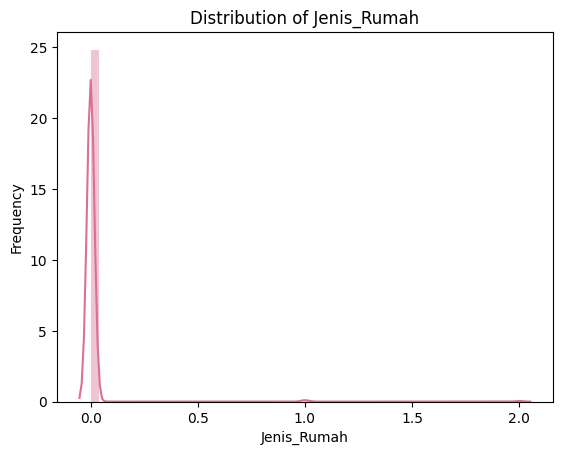

Lokasi skewness: -0.4451608777817668


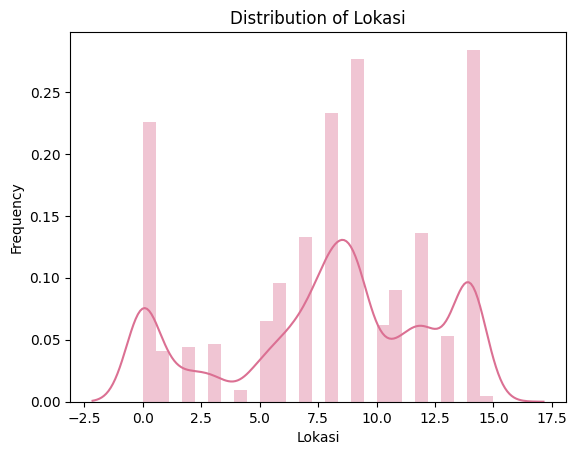

Kamar_Tidur skewness: 1.528026437385177


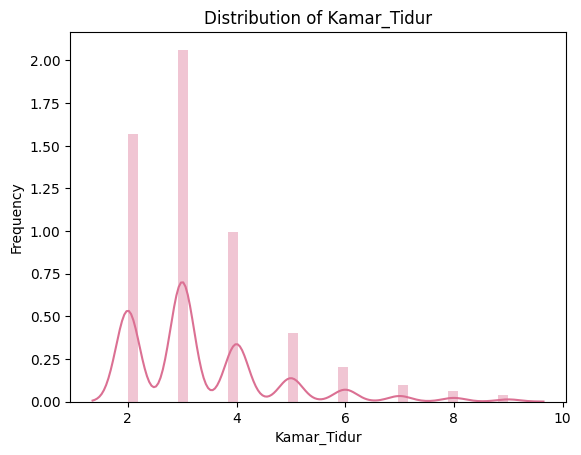

Kamar_Mandi skewness: 1.848112240753124


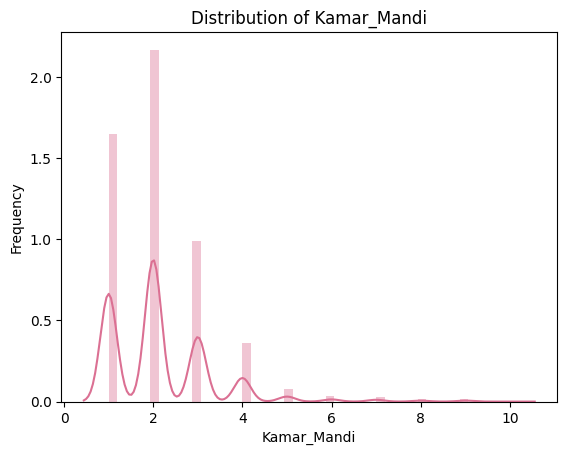

Garasi skewness: 4.161731186318472


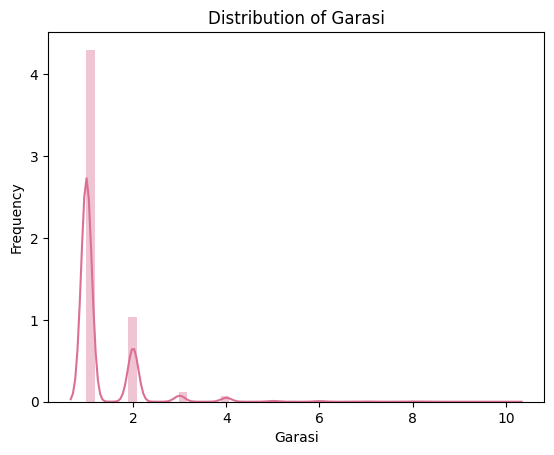

Luas_Tanah skewness: 2.193340684755528


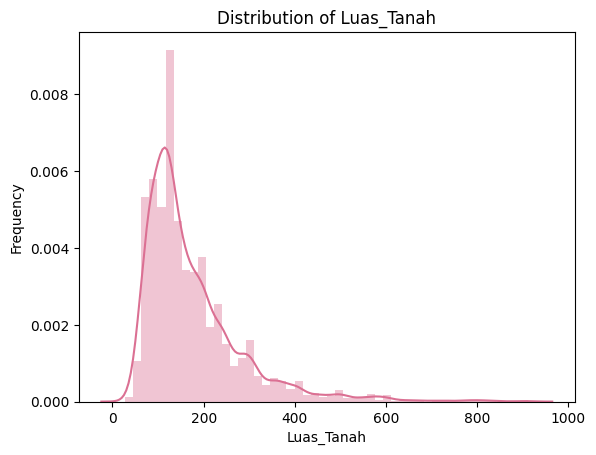

Luas_Bangunan skewness: 1.633769394148649


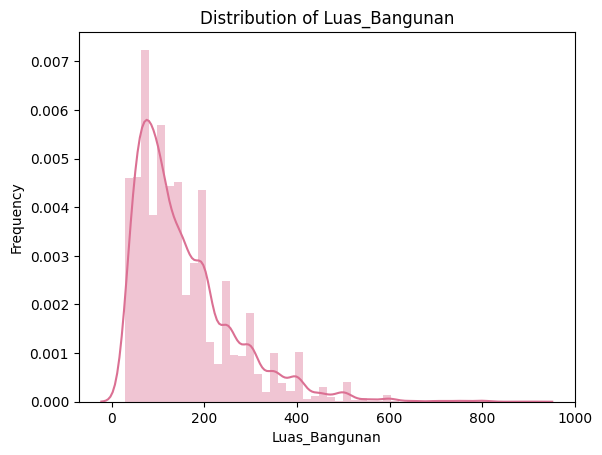

Harga skewness: 1.0870513855257804


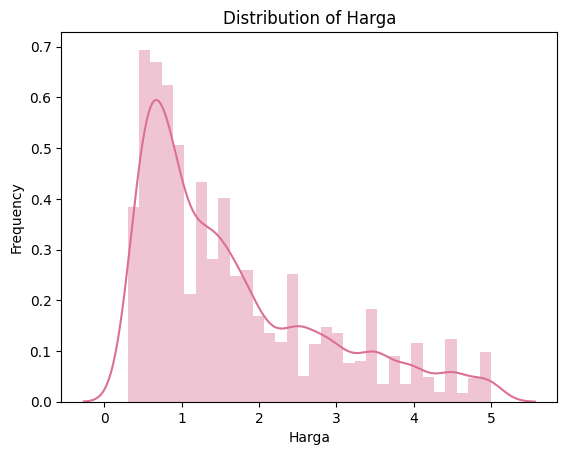

In [15]:
# Loop melalui kolom dan plot distribusinya
for col in df_Lencode:
    print(f'{col} skewness: {skew(df_Lencode[col])}')
    
    plt.figure()
    sns.distplot(df_Lencode[col], kde=True, color='palevioletred')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Pembagian train test split data
Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

In [24]:
X = df_Lencode.drop(columns=["Harga"],axis=1)
y = df_Lencode["Harga"]

# Memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

print("Jumlah data dalam data pelatihan:", len(X_train))
print("Jumlah data dalam data pengujian:", len(X_test))

Jumlah data dalam data pelatihan: 8579
Jumlah data dalam data pengujian: 954


# Multiple Linear Regression

## Pendefinisian dan modelling MLR
Mendefinisikan dan fit model linear regression.

In [16]:
LR = LinearRegression(fit_intercept = True,
                        copy_X = True,
                        n_jobs = True,
                        positive = False)

In [17]:
model_LR = LR.fit(X_train, y_train)
y_pred_lr = model_LR.predict(X_test)

## Evaluasi Model MLR
Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. Pada Linear Regression didalamnya berisi :
- R-squared, MSE, RMSE
- Nilai intercept dan slope
- Melihat harga hasil prediksi dan perbandingan dengan harga aktual
- Membuat visualisasi regresi masing-masing kondisi



In [18]:
mse_lr = mean_squared_error(y_test, y_pred_lr) 
rmse_lr = np.sqrt(mse_lr)  
print('Nilai R-squared : ', r2_score(y_test, y_pred_lr)) 
print('Nilai MSE : ', mse_lr)  
print('Nilai RMSE : ', rmse_lr)  

Nilai R-squared :  0.6117220979125978
Nilai MSE :  0.5472509390695074
Nilai RMSE :  0.7397641104227126


In [19]:
coef1 = model_LR.coef_
intercept = model_LR.intercept_
print("Nilai intercept :", model_LR.intercept_)
print("Nilai slope :", model_LR.coef_)

Nilai intercept : 0.0034021779539605834
Nilai slope : [ 0.10747449 -0.00175679 -0.03266552  0.15627358  0.06362592  0.00372474
  0.00452038]


In [20]:
# Koefisien regresi dengan rasio pembagian data yang menghasilkan performa terbaik di model MLR yaitu 75% : 25%
coefficients = LR.coef_
# Intercept regresi
intercept = LR.intercept_

# Mencetak persamaan regresi
print("Persamaan regresi linear:")
persamaan = f"y = {intercept}"
for i, coef in enumerate(coefficients):
    persamaan += f" + ({coef} * X{i+1})"
print(persamaan)

Persamaan regresi linear:
y = 0.0034021779539605834 + (0.10747448812003074 * X1) + (-0.0017567874928904868 * X2) + (-0.032665518913645185 * X3) + (0.15627358345573028 * X4) + (0.063625917659152 * X5) + (0.003724740724070206 * X6) + (0.004520382474806705 * X7)


## Membuat tabel perbandingan harga aktual dan prediksi
rasio pembagian data yang menghasilkan performa terbaik di model MLR yaitu 75% : 25%

In [21]:
y_pred_lr

array([0.86562175, 0.82060428, 1.97187277, ..., 1.63868247, 2.23801467,
       1.79666128])

In [22]:
kondisi1_LR = pd.DataFrame({'Actual':y_test, 
                            'Predicted':y_pred_lr, 
                            'Selisih': np.absolute(np.array(y_test) - np.array(y_pred_lr))})
print('Perbandingan harga asli dan prediksi model MLR :')
kondisi1_LR.head(10)

Perbandingan harga asli dan prediksi model MLR :


Actual  Predicted   Selisih
1842   0.645   0.865622  0.220622
1824   0.640   0.820604  0.180604
5622   1.500   1.971873  0.471873
2861   0.800   1.312219  0.512219
6651   1.990   2.233601  0.243601
2702   0.775   0.910112  0.135112
841    0.490   0.528381  0.038381
1536   0.595   0.884268  0.289268
1156   0.535   0.776286  0.241286
1478   0.585   1.007290  0.422290

## Membuat visualisasi model MLR

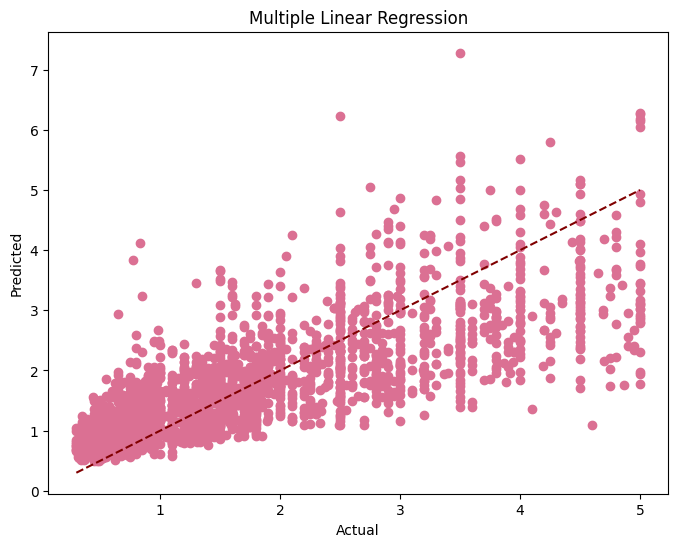

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='palevioletred')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='maroon', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')
plt.show()

# Random Forest Regression


## Pendefinisian dan Modelling RFR

In [25]:
RF = RandomForestRegressor(n_estimators = 200,
                           criterion = 'friedman_mse',
                           max_depth = None, 
                           min_samples_split = 2,
                           min_samples_leaf = 1,
                           bootstrap = True,
                           random_state = 0,
                           n_jobs = -1)

In [26]:
model_RF = RF.fit(X_train, y_train)
y_pred_rf = model_RF.predict(X_test)

## Evaluasi model

In [27]:
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

# evaluating the model
print("R squared :",r2_score(y_test, y_pred_rf))
print("Mean Squared Error : {}".format(mse))
print("Root Mean Squared Error : {}".format(rmse))

R squared : 0.7846714073637048
Mean Squared Error : 0.3029885603523123
Root Mean Squared Error : 0.5504439665872561


## Membuat tabel perbandingan harga aktual dan prediksi

In [28]:
y_pred_rf

array([0.83717681, 0.65193625, 2.4382    , 1.53874   , 2.116875  ,
       0.7659875 , 0.42797518, 0.66443128, 0.48776962, 0.58092875,
       2.86875   , 0.55329574, 3.17975   , 2.84775   , 1.51578667,
       0.63046833, 1.38626714, 0.90594845, 1.1025925 , 1.04528167,
       0.55075417, 2.284     , 0.90852693, 4.52885   , 2.6236    ,
       0.91067158, 3.8429125 , 1.72118333, 0.61289292, 0.79645335,
       1.56043333, 1.75747917, 1.11628423, 0.43215625, 1.77615   ,
       2.7724025 , 2.41645417, 0.77421064, 1.50635   , 2.51924167,
       0.81800525, 1.68621   , 0.79829033, 0.81506554, 0.6155686 ,
       3.26169583, 1.80020714, 0.46261458, 3.004025  , 1.401015  ,
       1.23882292, 0.65383367, 0.987005  , 0.52261982, 3.345275  ,
       2.14256667, 1.11985809, 0.64818557, 1.6527    , 1.20085   ,
       3.03982833, 1.92851   , 2.04975   , 0.80107652, 1.41325   ,
       1.66756   , 1.491925  , 0.57649071, 1.36464167, 2.44725   ,
       1.9137119 , 0.51542917, 0.45062379, 0.57547085, 3.62307

In [29]:
y_test

1842    0.645
1824    0.640
5622    1.500
2861    0.800
6651    1.990
        ...  
2860    0.800
4443    1.200
1167    0.540
2669    0.770
7848    2.800
Name: Harga, Length: 954, dtype: float64

In [30]:
# Mengubah numpy array menjadi pandas Series
y_predict1 = pd.Series(y_pred_rf)

print(y_predict1)

0      0.837177
1      0.651936
2      2.438200
3      1.538740
4      2.116875
         ...   
949    0.945417
950    1.032719
951    0.720891
952    0.743635
953    2.795550
Length: 954, dtype: float64


In [31]:
kondisi_RF = pd.DataFrame({'Actual':y_test, 
                            'Predicted':y_pred_rf,
                            'Selisih': np.absolute(np.array(y_test) - np.array(y_pred_rf))})
print('Perbandingan harga asli dan prediksi model RFR :')
kondisi_RF.head(10)

Perbandingan harga asli dan prediksi model RFR :


Actual  Predicted   Selisih
1842   0.645   0.837177  0.192177
1824   0.640   0.651936  0.011936
5622   1.500   2.438200  0.938200
2861   0.800   1.538740  0.738740
6651   1.990   2.116875  0.126875
2702   0.775   0.765988  0.009012
841    0.490   0.427975  0.062025
1536   0.595   0.664431  0.069431
1156   0.535   0.487770  0.047230
1478   0.585   0.580929  0.004071

## Membuat visualisasi model RFR

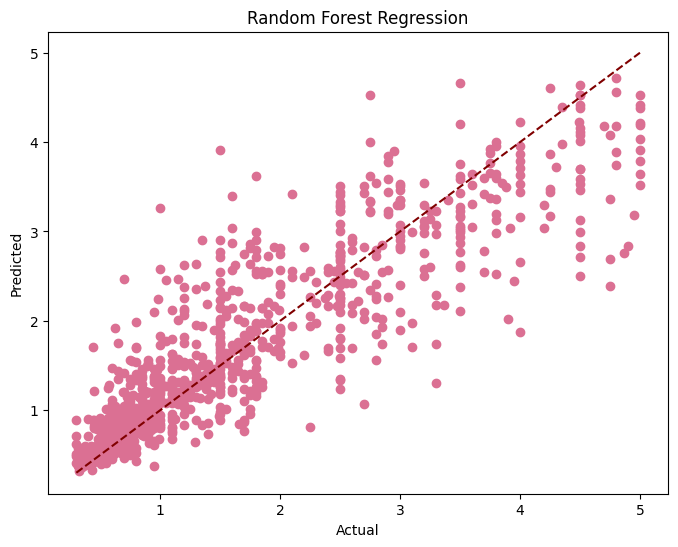

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='palevioletred')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='maroon', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')
plt.show()

In [33]:
# !pip install pydotplus
# !pip install graphviz

In [40]:
# !pip install pydotplus graphviz

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import pydotplus


(process:20848): GLib-GIO-WARNING **: 23:56:07.256: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.214.400_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs

(process:20848): GLib-GIO-WARNING **: 23:56:07.658: Unexpectedly, UWP app `Evernote.Evernote_10.89.2.0_x64__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs

(process:20848): GLib-GIO-WARNING **: 23:56:07.664: Unexpectedly, UWP app `Clipchamp.Clipchamp_3.1.10420.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:20848): GLib-GIO-WARNING **: 23:56:07.676: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2404.40.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.100937 to fit



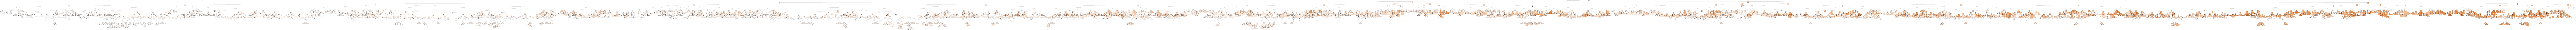

In [104]:
# Mengambil salah satu pohon keputusan dari Random Forest
tree = RF.estimators_[0]

# Ekspor pohon keputusan ke format dot file
dot_data = export_graphviz(tree, 
                           feature_names=df_Lencode.drop(columns=["Harga_New"]).columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Menggunakan pydotplus untuk membuat visualisasi pohon
graph = pydotplus.graph_from_dot_data(dot_data)

# Menampilkan gambar
image = Image(graph.create_png())
display(image)

# Variable Importance

In [34]:
# Mendapatkan feature importances dari model Random Forest
importances = RF.feature_importances_

# Membuat DataFrame dengan importances dan korelasi
feature_analysis = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Mengurutkan DataFrame berdasarkan Importance
feature_analysis = feature_analysis.sort_values(by='Importance', ascending=False)

# Menampilkan DataFrame
print(feature_analysis)

         Feature  Importance
5     Luas_Tanah    0.582662
6  Luas_Bangunan    0.239076
1         Lokasi    0.080150
3    Kamar_Mandi    0.041182
2    Kamar_Tidur    0.037755
4         Garasi    0.018353
0    Jenis_Rumah    0.000822


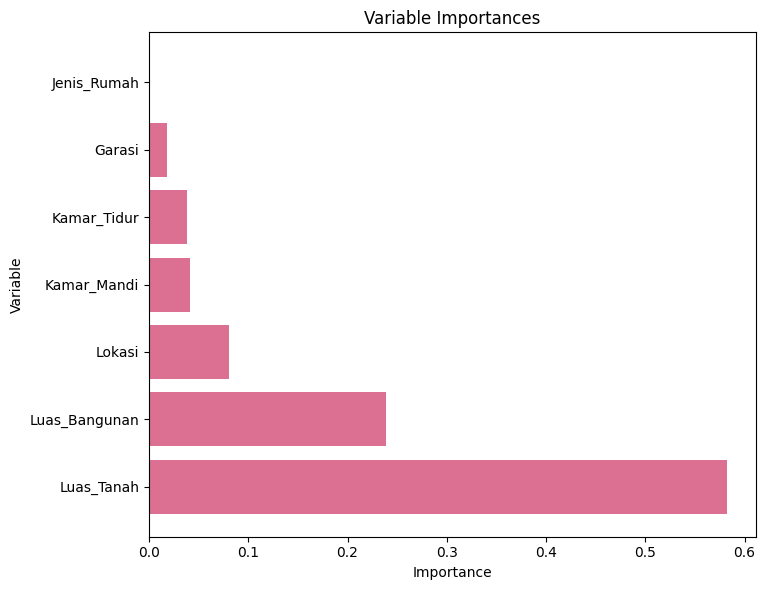

In [35]:
# Plotting bar chart untuk feature importances
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.barh(feature_analysis['Feature'], feature_analysis['Importance'], color='palevioletred')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importances')

plt.tight_layout()
plt.show()

# Validasi hasil prediksi

In [36]:
# Define the seven conditions
condition1 = data['Jenis_Rumah'] == "Rumah"
condition2 = data['Lokasi'] == "Tembalang, Semarang"
condition3 = data['Kamar_Tidur'] == 2
condition4 = data['Kamar_Mandi'] == 1
condition5 = data['Garasi'] == 1
condition6 = data['Luas_Tanah'] == 72
condition7 = data['Luas_Bangunan'] == 36

# Combine all conditions using the & operator
Validasi = data.loc[condition1 & condition2 & condition3 & condition4 & condition5 & condition6 & condition7]

# Display the filtered DataFrame
Validasi

Jenis_Rumah               Lokasi  Kamar_Tidur  Kamar_Mandi  Garasi  \
4          Rumah  Tembalang, Semarang            2            1       1   
34         Rumah  Tembalang, Semarang            2            1       1   
117        Rumah  Tembalang, Semarang            2            1       1   
182        Rumah  Tembalang, Semarang            2            1       1   
353        Rumah  Tembalang, Semarang            2            1       1   
481        Rumah  Tembalang, Semarang            2            1       1   
707        Rumah  Tembalang, Semarang            2            1       1   
1194       Rumah  Tembalang, Semarang            2            1       1   
1743       Rumah  Tembalang, Semarang            2            1       1   

      Luas_Tanah  Luas_Bangunan  Harga  
4             72             36   0.30  
34            72             36   0.31  
117           72             36   0.35  
182           72             36   0.36  
353           72             36   0.40  
481           72             36   0.43  
707           72             36   0.47  
1194          72             36   0.55  
1743          72             36   0.62

In [37]:
# Memasukkan data
input_data = [[0, 14, 2, 1, 1, 60, 36]]  # Data dalam bentuk list

# Konversi list ke array numpy
input_data_array = np.array(input_data)

# Lakukan prediksi menggunakan model RandomForestRegressor
prediction = model_RF.predict(input_data_array)

# Konversi prediksi ke dalam bentuk ratus juta rupiah
prediction_in_hundred_millions = prediction * 1_000_000_000

# Membulatkan hasil prediksi dengan menghapus bagian desimal
prediction_rounded = int(prediction_in_hundred_millions[0])

# Format hasil prediksi dengan pemisah ribuan
prediction_formatted = f"Rp. {prediction_rounded:,}".replace(",", ".")

# Cetak hasil prediksi
print("Prediksi harga :", prediction_formatted)

Prediksi harga : Rp. 503.438.125


# Model Inference
Dipilih model dengan algoritma random forest regression dengan kondisi 1 sebagai model yang akan dilakukan deployment.

In [38]:
model_inference = {'Jenis_Rumah':[0,0,2,0,1],
                   'Lokasi':[14,2,10,14,12],
                   'Kamar_Tidur':[2,4,4,3,1],
                   'Kamar_Mandi':[1,1,3,1,3],
                   'Garasi':[1,2,3,1,2],
                   'Luas_Tanah':[60,95,616,150,87],
                   'Luas_Bangunan':[30,84,450,120,76]
                  }
model_inference = pd.DataFrame(model_inference)
model_inference

Jenis_Rumah  Lokasi  Kamar_Tidur  Kamar_Mandi  Garasi  Luas_Tanah  \
0            0      14            2            1       1          60   
1            0       2            4            1       2          95   
2            2      10            4            3       3         616   
3            0      14            3            1       1         150   
4            1      12            1            3       2          87   

   Luas_Bangunan  
0             30  
1             84  
2            450  
3            120  
4             76

In [39]:
# Lakukan prediksi dengan model
prediksi = model_RF.predict(model_inference)

# Proses dan cetak setiap hasil prediksi
for prediction in prediksi:
    # Konversi prediksi ke dalam bentuk ratus juta rupiah
    prediction_in_hundred_millions = prediction * 1_000_000_000

    # Membulatkan hasil prediksi dengan menghapus bagian desimal
    prediction_rounded = int(prediction_in_hundred_millions)

    # Format hasil prediksi dengan pemisah ribuan
    prediction_formatted = f"Rp. {prediction_rounded:,}".replace(",", ".")

    # Cetak hasil prediksi
    print("Prediksi harga :", prediction_formatted)

Prediksi harga : Rp. 486.398.922
Prediksi harga : Rp. 821.049.999
Prediksi harga : Rp. 4.225.349.999
Prediksi harga : Rp. 1.398.287.499
Prediksi harga : Rp. 1.055.405.833


# Deployment


In [48]:
import pickle

filename = 'prediksi_harga_rumah_smg.sav'
pickle.dump(model_RF, open(filename,'wb'))